Explore the bash history of this computer
========

Load the bash history on this computer

In [1]:
from os.path import expanduser
import matplotlib.pyplot as plt
from exploration import words as w

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    unigram_count = w.counts_of(corpus, (1,1))
    bigram_count = w.counts_of(corpus, (2,2))

In [2]:
def plot_histogram_of(words):
    sorted_word_count = sorted(words, key = lambda x: -x[1])
    top = sorted_word_count[:10]
    top_words = list(map(lambda x: x[0], top))
    top_counts = list(map(lambda x: x[1], top))
    _ = plt.bar(top_words, top_counts) 
    plt.xticks(rotation='vertical')
    plt.title("Most popular CLI n-grams")
    plt.show()
    

The most popular unigrams are:

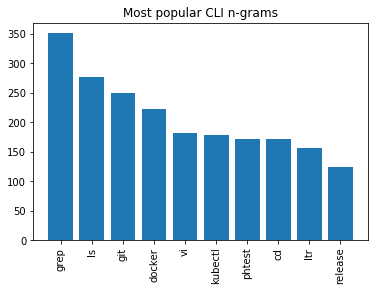

In [3]:
plot_histogram_of(unigram_count)

The most popular bigrams are:

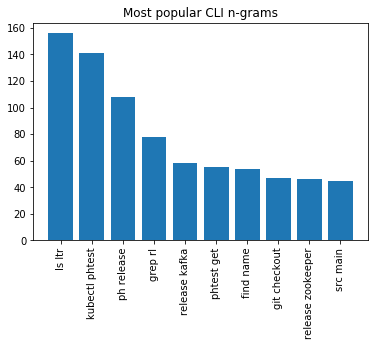

In [4]:
plot_histogram_of(bigram_count)

The entropy in the corpus:

In [5]:
from scipy.stats import entropy

def entropy_of(corpus, ngram_range):
    entropy_results = []
    for chunk in w.randomized_chunks_of(corpus):
        h = entropy(w.probabilities_of(w.counts_of(chunk, ngram_range)))
        entropy_results.append(h)
        
    return entropy_results
    
print('unigram entropy ', entropy(w.probabilities_of(unigram_count)))
print('bigram entropy  ', entropy(w.probabilities_of(bigram_count)))

ngram_range = (1, 3)
hs = entropy_of(corpus, ngram_range)

print('mean = {}, std dev = {} for n-grams in range {}'.format(statistics.mean(hs), statistics.stdev(hs), ngram_range))

unigram entropy  5.471363951225183
bigram entropy   6.686978137045836
mean = 6.234382196240459, std dev = 0.08393033460387236 for n-grams in range (1, 3)


Now, with the history from another box albeit by the same programmer

In [6]:
with (open(home + "/.bash_history3")) as f:
    history = f.read()
    corpus2 = history.split('\n')
    unigram_count2 = w.counts_of(corpus2, (1,1))
    bigram_count2 = w.counts_of(corpus2, (2,2))

hs = entropy_of(corpus2, ngram_range)

print('mean = {}, std dev = {} for n-grams in range {}'.format(statistics.mean(hs), statistics.stdev(hs), ngram_range))

mean = 6.17632301730121, std dev = 0.1330594191127514 for n-grams in range (1, 3)


Let's compare the two

In [7]:
def padding(xs, ys, alpha):
    diff = xs - ys
    return list(map(lambda x: [x, alpha], diff))

def smoothing(word_count1, word_count2, alpha):
    words1 = w.words_of(word_count1)
    words2 = w.words_of(word_count2)
    padding1 = padding(words2, words1, alpha)
    padding2 = padding(words1, words2, alpha)
    return word_count1 + padding1, word_count2 + padding2

ngrams1 = w.counts_of(corpus, ngram_range)
ngrams2 = w.counts_of(corpus2, ngram_range)
wc1, wc2 = smoothing(ngrams1, ngrams2, 1e-5)

comparison = entropy(w.probabilities_of(wc1), w.probabilities_of(wc2))
print('Comparative entropy of both corpii = {}'.format(comparison))

Comparative entropy of both corpii = 2.2647323772401116
